In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [2]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()  # Set to evaluation mode


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:01<00:00, 175MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [8]:
preprocess = transforms.Compose([
    transforms.Resize((520, 520)),       # Resize to fit model input dimensions
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [9]:
def segment_image(image_path):
    # Load the image
    input_image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch

    # Check if a GPU is available and if not, use a CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    input_batch = input_batch.to(device)

    # Perform inference
    with torch.no_grad():
        output = model(input_batch)["out"][0]

    # Get the segmentation mask by taking the argmax
    output_predictions = output.argmax(0).cpu().numpy()

    return output_predictions

In [10]:
def display_segmented_image(image_path, segmented_output):
    # Load the original image
    input_image = Image.open(image_path).convert("RGB")
    plt.figure(figsize=(10, 5))

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.axis("off")
    plt.title("Original Image")

    # Show the segmentation mask
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_output, cmap="jet")
    plt.axis("off")
    plt.title("Segmentation Mask")

    plt.show()

In [14]:
from google.colab import files
files.upload()

Saving cat.jpeg to cat (1).jpeg


{'cat (1).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x14\x14\x13\x16\x14\x14\x14\x17\x17\x16\x18\x1a \x1c\x1a\x18\x19\x1a!\x1e\x1c\x1b!\x1a!\x1c\x1b\x1f!\x19\x1e\x19\x1e,!\x1b\x1b&\x1c\x1e "3#&+-001\x1a!5:5/9+/0-\x01\n\n\n\x0f\x0e\x0f\x1c\x11\x11\x1b/(!&/1211218/1/////1////17////////1/21////////////71//\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x00\x01\x07\xff\xc4\x00<\x10\x00\x02\x01\x02\x05\x02\x04\x04\x04\x05\x04\x02\x01\x05\x00\x00\x01\x02\x11\x03!\x00\x04\x121A"Q\x05\x13aq2\x81\x91\xa1\x06B\xb1\xf0\x14R\xc1\xd1\xe1\x15#b\xf1r\x92\x82\x07\x163c\xb2\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x00\x05\x06\xff\xc4\x00/\x11\x00\x02\x02\x01\x03\x02\x04\x06\x02\x02\x03\x01\x00\x00\x00\x00\x00\x01\x02\x11!\x03\x121\x04A\x13Qq\xf0"a\x81\x

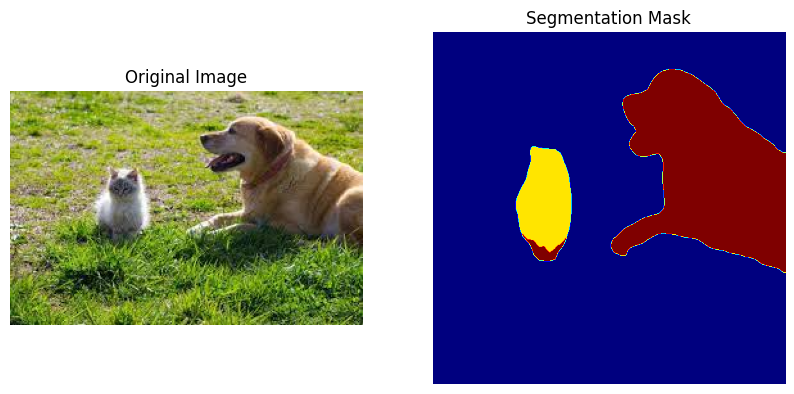

In [15]:
image_path = 'cat.jpeg'
segmented_output = segment_image(image_path)
display_segmented_image(image_path, segmented_output)